<a href="https://colab.research.google.com/github/talhaDS04/Heart_Disease_Prediction/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction using Machine Learning

### 1.0 Importing the libraries

In [1]:
# STEP 1: Install required packages (only needed once)
!pip install xgboost

# STEP 1: Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

### 1.1 Loading  heart.csv

In [3]:
df = pd.read_csv('/content/heart.csv')
#df = df.drop_duplicates()

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.shape

(1025, 14)

In [7]:
pd.set_option('display.float', "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [10]:
df.target.value_counts()

,count
target,
1,526
0,499


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 5.1 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
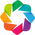

:Bars   [target]   (count)

In [11]:
!pip install hvplot

import holoviews as hv
hv.extension('bokeh')


import hvplot.pandas

df.target.value_counts().hvplot.bar(
    title="Heart Disease Count",
    xlabel="Heart Disease",
    ylabel="Count",
    width=500,
    height=350
)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
categorical_val =[]
continuos_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuos_val.append(column)

categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
continuos_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
df['target']

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


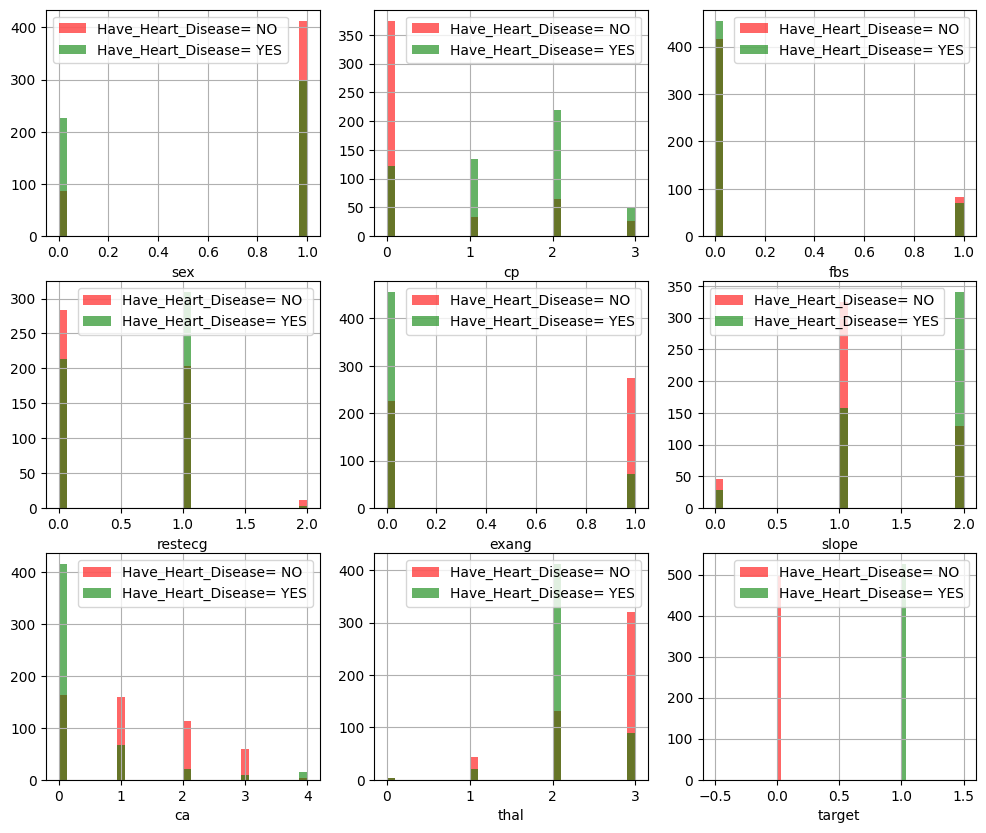

In [16]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3,3,i)
    df[df["target"] == 0][column].hist(bins=30, color="red", label="Have_Heart_Disease= NO", alpha=0.6)
    df[df["target"] == 1][column].hist(bins=30, color="green", label="Have_Heart_Disease= YES", alpha=0.6)

    plt.legend()
    plt.xlabel(column)

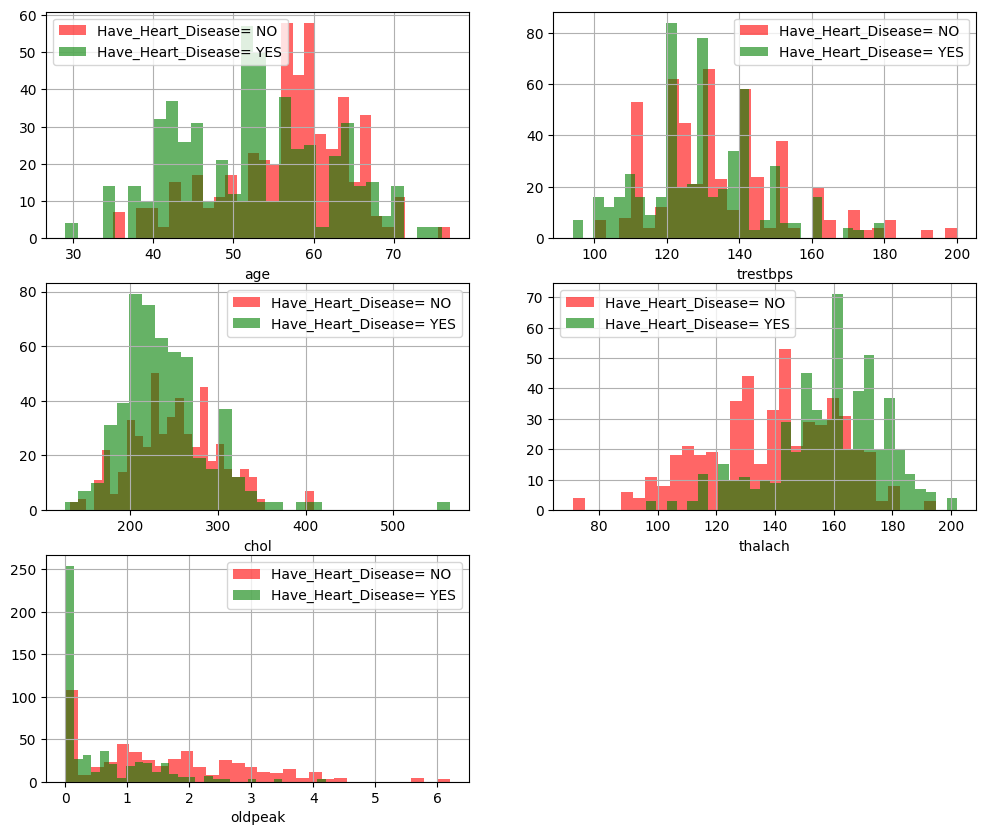

In [17]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(continuos_val, 1):
    plt.subplot(3,2,i)
    df[df["target"] == 0][column].hist(bins=30, color="red", label="Have_Heart_Disease= NO", alpha=0.6)
    df[df["target"] == 1][column].hist(bins=30, color="green", label="Have_Heart_Disease= YES", alpha=0.6)

    plt.legend()
    plt.xlabel(column)

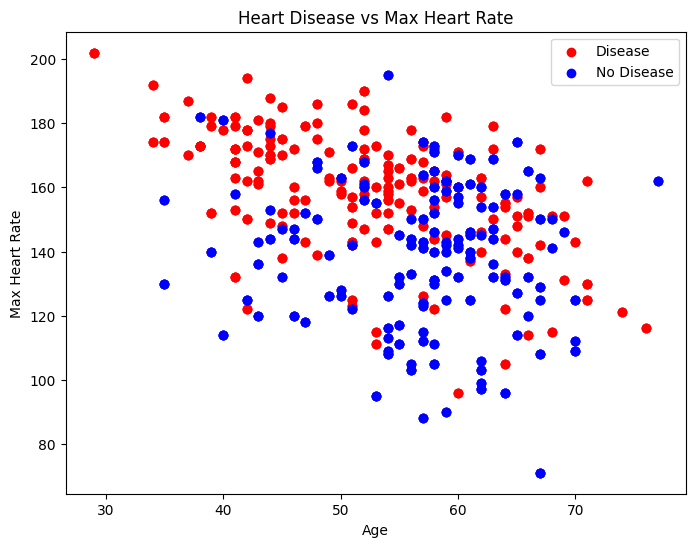

In [18]:
plt.figure(figsize=(8, 6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = 'red'
            )


plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = 'blue'
            )

plt.title("Heart Disease vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", 'No Disease'])

In [19]:
Corr_matrix = df.corr()
Corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


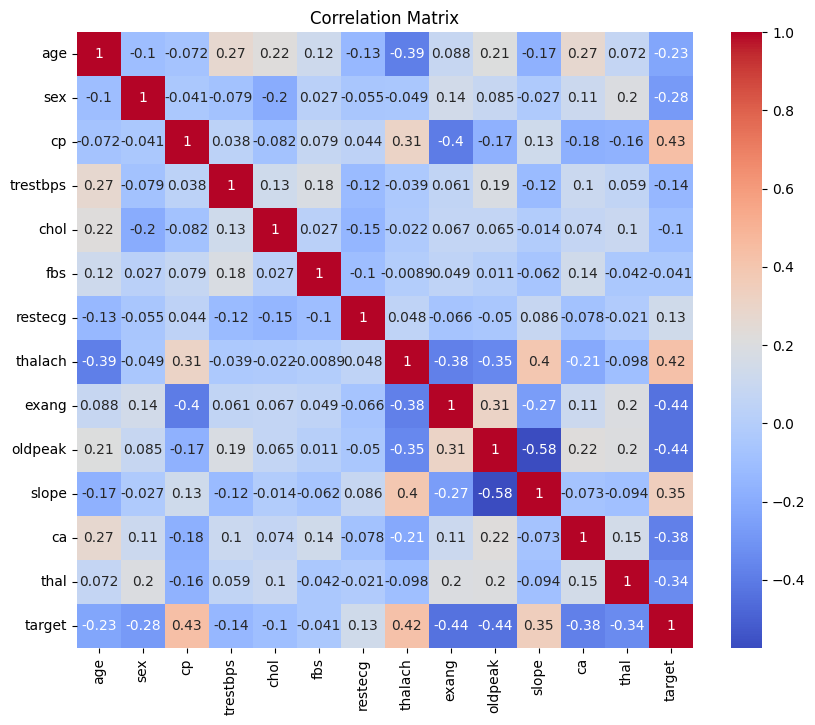

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(Corr_matrix, annot=True, cmap="coolwarm" , square=True)
plt.title("Correlation Matrix")
plt.show()

In [21]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.00,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.10,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.60,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.00,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.90,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [23]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = s.fit_transform(dataset[columns_to_scale])

In [26]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.16,0.48,-0.83,0.26,1.73,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.72,0.76,-1.40,-1.05,1.30,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.72,0.94,-0.83,0.52,-0.91,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.83,0.36,0.93,-1.87,0.71,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [27]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix , precision_score , recall_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n ==========================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("-"*80)
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("-"*80)
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")


    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n ==========================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("-"*80)
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("-"*80)
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [28]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(n_estimators= 100, random_state=42)
rf.fit(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_test, train = True)
print_score(rf, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 99.03%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.98      0.99       0.99          0.99
f1-score    0.99   0.99      0.99       0.99          0.99
support   159.00 149.00      0.99     308.00        308.00
---

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_test, train = True)
print_score(lr, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 89.54%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.89      0.90       0.90          0.90
recall      0.87   0.92      0.90       0.89          0.90
f1-score    0.89   0.90      0.90       0.89          0.90
support   340.00 377.00      0.90     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.79      0.82       0.82          0.82
recall      0.79   0.85      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
----

In [31]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train = True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   159.00 149.00      0.98     308.00        308.00
---

In [32]:
svm = SVC(kernel= "rbf" , gamma=0, C=1.0)
svm.fit(X_train, y_train)

print_score(svm, X_train, y_train, X_test, y_test, train = True)
print_score(svm, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 52.58%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.00   0.53      0.53       0.26          0.28
recall      0.00   1.00      0.53       0.50          0.53
f1-score    0.00   0.69      0.53       0.34          0.36
support   340.00 377.00      0.53     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[  0 340]
 [  0 377]]

Test Result:
Accuracy Score: 48.38%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.00   0.48      0.48       0.24          0.23
recall      0.00   1.00      0.48       0.50          0.48
f1-score    0.00   0.65      0.48       0.33          0.32
support   159.00 149.00      0.48     308.00        308.00
----

In [33]:
dt_c = DecisionTreeClassifier()
dt_c.fit(X_train, y_train)

print_score(dt_c, X_train, y_train, X_test, y_test, train = True)
print_score(dt_c, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   159.00 149.00      0.98     308.00        308.00
---

In [34]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

print_score(nbc, X_train, y_train, X_test, y_test, train = True)
print_score(nbc, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 82.15%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.76      0.82       0.85          0.84
recall      0.67   0.96      0.82       0.81          0.82
f1-score    0.78   0.85      0.82       0.82          0.82
support   340.00 377.00      0.82     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[228 112]
 [ 16 361]]

Test Result:
Accuracy Score: 77.92%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.71      0.78       0.81          0.81
recall      0.64   0.93      0.78       0.78          0.78
f1-score    0.75   0.80      0.78       0.78          0.78
support   159.00 149.00      0.78     308.00        308.00
----

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 91.77%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.92      0.92       0.92          0.92
recall      0.91   0.92      0.92       0.92          0.92
f1-score    0.91   0.92      0.92       0.92          0.92
support   340.00 377.00      0.92     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[310  30]
 [ 29 348]]

Test Result:
Accuracy Score: 81.82%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.82       0.82          0.82
recall      0.77   0.87      0.82       0.82          0.82
f1-score    0.81   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
----

In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score

results = []

train_scores = accuracy_score(y_train, knn.predict(X_train))
test_scores = accuracy_score(y_test, knn.predict(X_test))
results.append(['KNN', train_scores, test_scores])

train_scores = accuracy_score(y_train, lr.predict(X_train))
test_scores = accuracy_score(y_test, knn.predict(X_test))
results.append(['Logistic Regression', train_scores, test_scores])

train_scores = accuracy_score(y_train, xgb_clf.predict(X_train))
test_scores = accuracy_score(y_test, xgb_clf.predict(X_test))
results.append(['XGBoost', train_scores, test_scores])

train_scores = accuracy_score(y_train, svm.predict(X_train))
test_scores = accuracy_score(y_test, svm.predict(X_test))
results.append(['SVM', train_scores, test_scores])

train_scores = accuracy_score(y_train, dt_c.predict(X_train))
test_scores = accuracy_score(y_test, dt_c.predict(X_test))
results.append(['Decision Tree', train_scores, test_scores])

train_scores = accuracy_score(y_train, rf.predict(X_train))
test_scores = accuracy_score(y_test, knn.predict(X_test))
results.append(['Random Forest', train_scores, test_scores])

train_scores = accuracy_score(y_train, nbc.predict(X_train))
test_scores = accuracy_score(y_test, nbc.predict(X_test))
results.append(['Naive Bayes', train_scores, test_scores])

results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
results_df

,Model,Train Accuracy,Test Accuracy
0,KNN,0.92,0.82
1,Logistic Regression,0.90,0.82
2,XGBoost,1.00,0.98
3,SVM,0.53,0.48
4,Decision Tree,1.00,0.98
5,Random Forest,1.00,0.82
6,Naive Bayes,0.82,0.78


 ## 2.  Model Hyperparameter tuning

### 2.0 Logistic Regression Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

paramts = {
    'C': np.logspace(-3,3,7),
    'solver': ['liblinear']
}

lr_c = LogisticRegression()

lr_cv = GridSearchCV(lr_c, paramts,scoring = "accuracy", cv=5, n_jobs=-1)
lr_cv.fit(X_train, y_train)

best_params = lr_cv.best_params_
print(best_params)

lr_c = LogisticRegression(**best_params)
lr_c.fit(X_train, y_train)

print_score(lr_c, X_train, y_train, X_test, y_test, train = True)
print_score(lr_c, X_train, y_train, X_test, y_test, train = False)

{'C': np.float64(0.1), 'solver': 'liblinear'}
Train Result:
Accuracy Score: 88.84%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.89      0.89       0.89          0.89
recall      0.87   0.90      0.89       0.89          0.89
f1-score    0.88   0.90      0.89       0.89          0.89
support   340.00 377.00      0.89     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[296  44]
 [ 36 341]]

Test Result:
Accuracy Score: 82.14%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.79      0.82       0.82          0.83
recall      0.78   0.87      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 

### 2.1 K-Nearest Neighbour Hyperparameter Tuning

Maximum KNN score on the test data = 100.00%


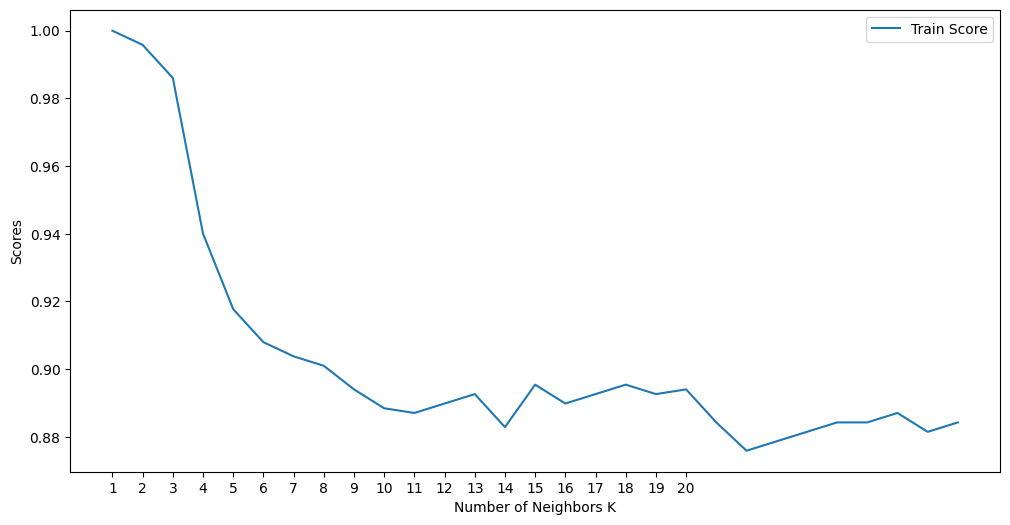

In [38]:
train_scores =[]
test_scores = []
neighbors = list(range(1,30))

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))


plt.figure(figsize=(12, 6))
plt.plot(neighbors, train_scores, label='Train Score')

plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Scores')
plt.legend()

print(f"Maximum KNN score on the test data = {max(train_scores)*100:.2f}%")

In [39]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)


Train Result:
Accuracy Score: 88.70%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.88      0.89       0.89          0.89
recall      0.86   0.92      0.89       0.89          0.89
f1-score    0.88   0.89      0.89       0.89          0.89
support   340.00 377.00      0.89     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[291  49]
 [ 32 345]]

Test Result:
Accuracy Score: 83.44%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.78      0.83       0.84          0.84
recall      0.77   0.91      0.83       0.84          0.83
f1-score    0.83   0.84      0.83       0.83          0.83
support   159.00 149.00      0.83     308.00        308.00
----

### 2.2 SVM Hyperparameter Tuning

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initial model (gamma should not be 0)
svm_clf = SVC(kernel='rbf', gamma='scale', C=1.0)

# Hyperparameter grid
params = {
    'C': [0.1, 0.5, 1, 2, 5, 10, 20],
    'gamma': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# GridSearchCV
svm_cv = GridSearchCV(svm_clf, params, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
svm_cv.fit(X_train, y_train)

# Best parameters
best_params = svm_cv.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

# Evaluate
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best Parameters: {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f

### 2.3 Decision Tree Classifier Hyperparameter Tuning

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


params = { "criterion" : ["gini", "entropy"],
          "splitter" : ["best", "random"],
           "max_depth" : (list(range(1,20))),
           "min_samples_split" : [2,3,4],
           "min_samples_leaf" : list(range(1,20))
}

tree_clf = DecisionTreeClassifier(random_state=42)

tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print("Best Parameters:", best_params)

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   1.00      0.97       0.97      

### 2.4 Random Forest Classifier  Hyperparameter Tuning

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Initial model
rf_clf = RandomForestClassifier(random_state=42)

# Grid Search
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)

# Best params
best_params = rf_cv.best_params_
print("Best Parameters:", best_params)

# Train with best parameters
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

# Evaluation
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98    

In [44]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params_grid = dict(
    n_estimators = stats.randint(10, 1000),
    max_depth = stats.randint(1, 10),
    learning_rate = stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder = False ,eval_metric="logloss")
xgb_cv = RandomizedSearchCV(xgb_clf, params_grid, scoring="accuracy",n_iter=150, cv=5, n_jobs=-1, verbose=1)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print("Best Parameters:", best_params)

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'learning_rate': np.float64(0.8279302756254878), 'max_depth': 5, 'n_estimators': 235}
Train Result:
Accuracy Score: 100.00%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Model and hyperparameter grid
gnb = GaussianNB()
params_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Grid search
gnb_cv = GridSearchCV(
    estimator=gnb,
    param_grid=params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1
)
gnb_cv.fit(X_train, y_train)

# Best params
best_params = gnb_cv.best_params_
print("Best Parameters:", best_params)

# Final model
gnb = GaussianNB(**best_params)
gnb.fit(X_train, y_train)

# Evaluation
print_score(gnb, X_train, y_train, X_test, y_test, train=True)
print_score(gnb, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'var_smoothing': 1e-05}
Train Result:
Accuracy Score: 83.96%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.81      0.84       0.85          0.84
recall      0.76   0.91      0.84       0.84          0.84
f1-score    0.82   0.86      0.84       0.84          0.84
support   340.00 377.00      0.84     717.00        717.00
--------------------------------------------------------------------------------
Confusion Matrix: 
 [[259  81]
 [ 34 343]]

Test Result:
Accuracy Score: 80.52%
--------------------------------------------------------------------------------
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.74      0.81       0.82          0.82
recall      0.70   0.92      0.81       0.81          0.81
f1-score    0.79   0

In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score

results = {
    'models': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Logistic Regression': lr_c,
    'KNN': knn,
    'SVM': svm_clf,
    'Decision Tree': tree_clf,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Naive Bayes': gnb
}

for name, model in models.items():
    train_score = accuracy_score(y_train, model.predict(X_train))
    test_score = accuracy_score(y_test, model.predict(X_test))
    results['models'].append(name)
    results['Train Accuracy'].append(train_score)
    results['Test Accuracy'].append(test_score)

results_df = pd.DataFrame(results)
results_df

,models,Train Accuracy,Test Accuracy
0,Logistic Regression,0.89,0.82
1,KNN,0.89,0.83
2,SVM,1.00,0.98
3,Decision Tree,1.00,0.97
4,Random Forest,1.00,0.98
5,XGBoost,1.00,0.98
6,Naive Bayes,0.84,0.81


In [51]:
def feature_imp(df, model):
  fi = pd.DataFrame()
  fi["feature"] = df.columns
  fi["importance"] = model.feature_importances_
  fi = fi.sort_values(by="importance", ascending=False)
  return fi.sort_values(by="importance", ascending=False)

<Axes: >

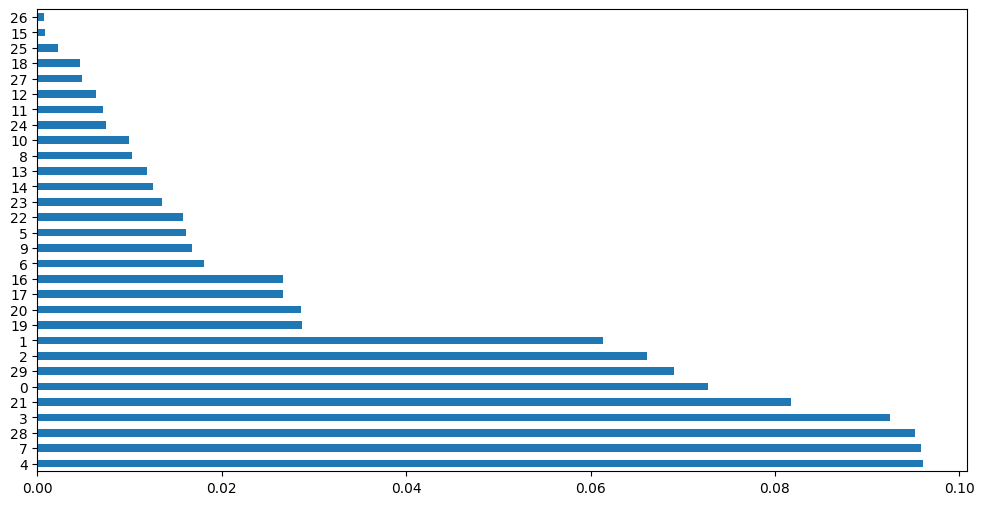

In [52]:
feature_imp(X, rf_clf).plot(kind="barh", figsize=(12,6), legend=False)

<Axes: >

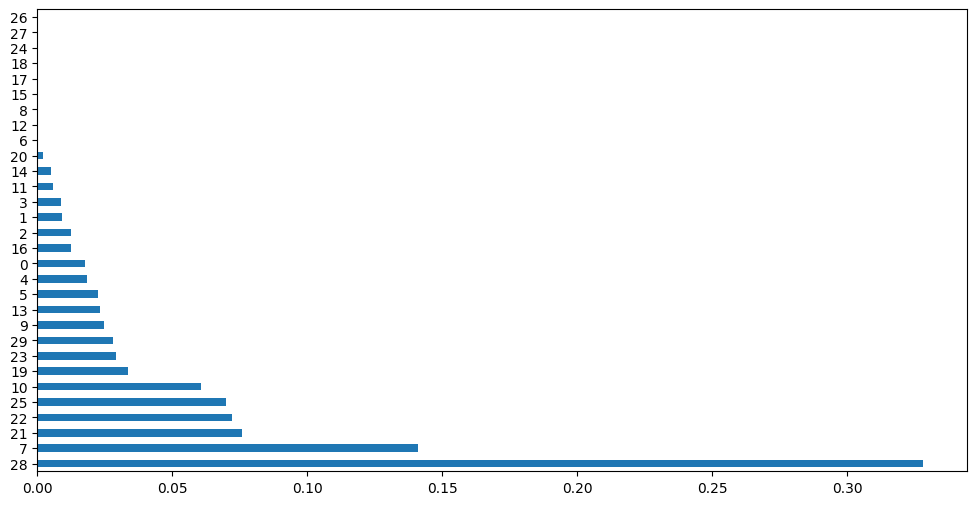

In [53]:
feature_imp(X, xgb_clf).plot(kind="barh", figsize=(12,6), legend=False)

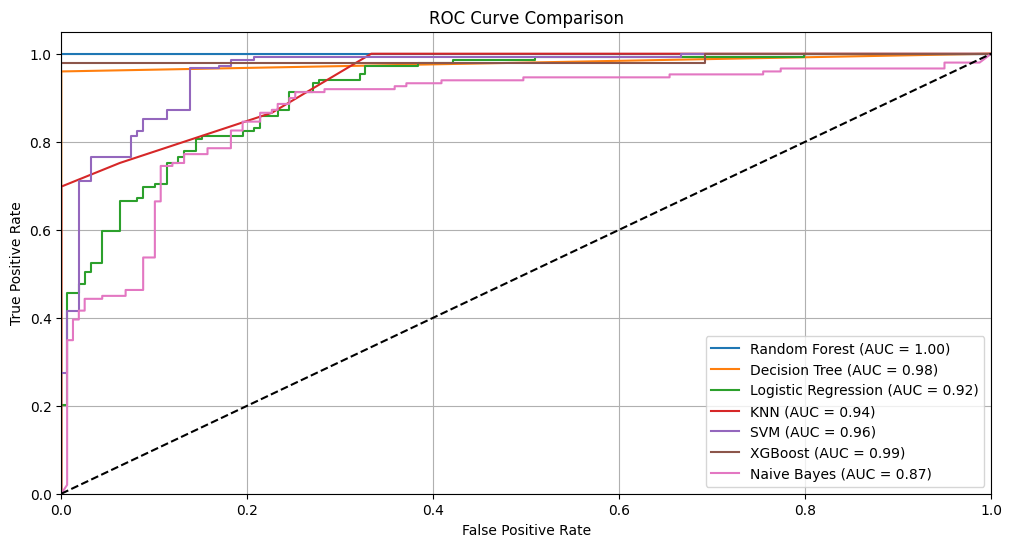

ROC AUC Values:
Random Forest: 1.00
Decision Tree: 0.98
Logistic Regression: 0.92
KNN: 0.94
SVM: 0.96
XGBoost: 0.99
Naive Bayes: 0.87


In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB()
}

# Plot ROC curves
plt.figure(figsize=(12, 6))
roc_auc_scores = {}  # Use dict instead of list

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print AUC Scores
print("ROC AUC Values:")
for name, score in roc_auc_scores.items():
    print(f"{name}: {score:.2f}")

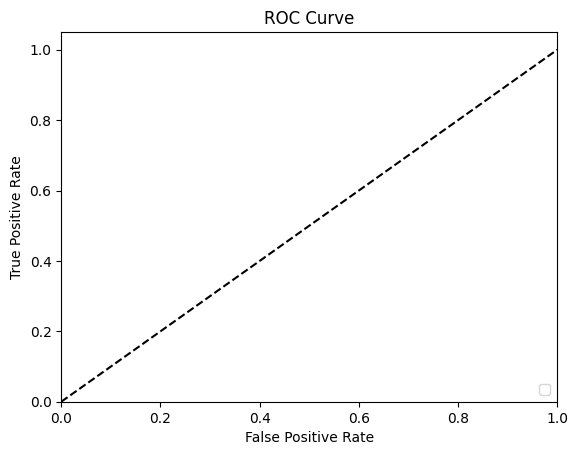

In [55]:
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

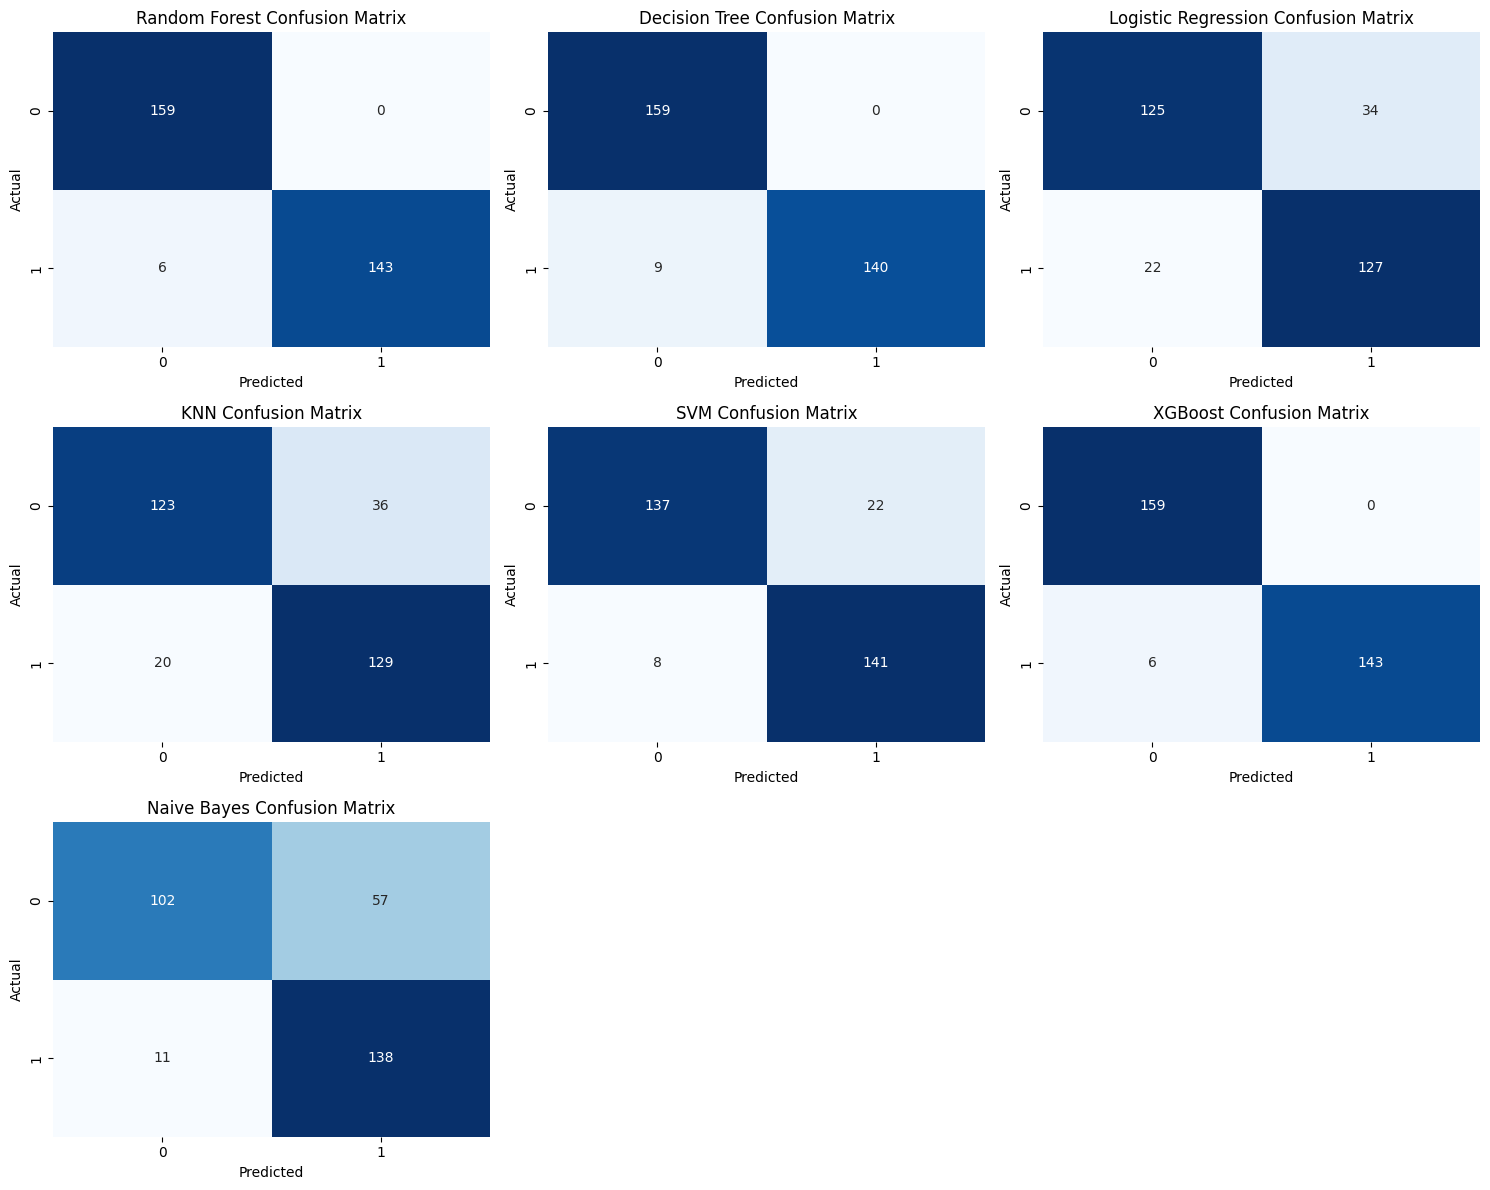

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 12))

for i, (name, clf) in enumerate(classifiers.items(), start=1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  # use class labels, not probabilities
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [58]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
1020,0.50,0.48,-0.48,0.65,-0.91,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
479,0.39,-0.21,-0.58,-0.79,0.96,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
227,-1.15,-0.78,-0.08,-0.00,-0.66,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
910,-0.49,0.48,-0.25,0.60,-0.40,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
362,-1.26,-0.55,-0.64,0.69,-0.74,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [59]:
y_train.head()

,target
1020,1
479,0
227,1
910,0
362,1


In [60]:
print("Training feature name :", X_train.columns.tolist())

Training feature name : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']


In [63]:
new_data = pd.DataFrame({
    'age' : [63],
    'sex' : [1],
    'cp' : [3],
    'trestbps' : [145],
    'chol' : [233],
    'fbs' : [1],
    'restecg' : [0],
    'thalach' : [150],
    'exang' : [0],
    'oldpeak' : [2.3],
    'slope' : [1],
    'ca' : [0],
    'thal' : [1]
})

new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

new_prediction = rf.predict(new_data)
print("Random Forest predicted Outcome for new data :",new_prediction)

Random Forest predicted Outcome for new data : [0]


In [64]:
import pickle
from sklearn.metrics import accuracy_score

# Train models and track accuracy
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}%")

# Identify best model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_model_accuracy:.2f}%")

# Save the best model (Random Forest in this example)
best_model = classifiers[best_model_name]

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest Accuracy: 98.05%
Decision Tree Accuracy: 98.05%
Logistic Regression Accuracy: 81.82%
KNN Accuracy: 81.82%
SVM Accuracy: 90.26%
XGBoost Accuracy: 98.05%
Naive Bayes Accuracy: 77.92%

The best model is: Random Forest with an accuracy of 98.05%
Random Forest model saved as 'random_forest_model.pkl'
